#Code is used for the Shakespeare example

# Functions

In [0]:
def make_initial_population():
  population = []
  for i in range(population_size):
    gene = ''
    for j in range(len(target)):
      gene += random.choice(letters)
    
    population.append(gene)
    
  return population

In [0]:
def step_score(score):
  if score == len(target):
    return score
  else:
    return (score//step)*step

In [0]:
def calculate_scores(population):
  score = calculate_scoresx(population,target)
  return list(np.array(score))
  

In [0]:
def calculate_scoresx(population,target):
  scores = []
  for gene in population:
    score = 0
    for gene_letter,target_letter in zip(gene,target):
      if gene_letter == target_letter:
        score += 1
    if(step > 1): score = step_score(score)
    scores.append(score)

  return scores

In [0]:
def calculate_normalized_fitness(scores):
  sum_scores = sum(scores)
  if sum_scores > 0:
    normalized_fitness = [score/sum_scores for score in scores]
  else:
    normalized_fitness = len(scores)*[1/len(scores)]

  return normalized_fitness

In [0]:
def make_mating_pool(population,fitness):
  mating_pool = []
  for gene,prob in zip(population,fitness):
    mating_pool += prob*[gene]
    
  return mating_pool

In [0]:
def crossover(parent_A,parent_B):
  cut = random.randint(1,len(parent_A)-1)
  child = parent_A[:cut] + parent_B[cut:]
  
  return child

In [0]:
def mutate(child,mutation_rate):
  mutated_child = child
  if random.random() < mutation_rate:
    temp = list(child)
    x = random.randint(0, len(child)-1)
    temp[x] = random.choice(letters)
    mutated_child = "".join(temp)
    
  return mutated_child  

In [0]:
def reproduce(population, fitness, mutation_rate):
  new_population = []
  while len(new_population) < len(population):
    parent_A = np.random.choice(population, p=fitness)
    parent_B = np.random.choice(population, p=fitness)
    new_child = crossover(parent_A,parent_B)
    if new_child != None:
      new_child = mutate(new_child,mutation_rate)
      if new_child != None:
        new_population.append(new_child)

  return new_population

In [0]:
def find_best_child(population):
  fitness = calculate_normalized_fitness(population,target)
  max_fitness = 0
  for child,score in zip(population,fitness):
    if score > max_fitness:
      best_child = child
      
  return best_child

In [0]:
def write_pop(gen,population, scores, normalized_fitness):
  for gene, score, fitness in zip(population, scores, normalized_fitness):
     f.write(','.join(['pop',str(gen),gene, str(score), str(fitness)+'\n']))

In [0]:
def sanitize(population, scores):
  if prune_population:
    population_tuples = []
    gene_list = []
    population_tuples = []
    for score, gene in zip(scores,population):
      if gene not in gene_list:
        gene_list.append(gene)
        population_tuples.append((score, gene))
  else:
    population_tuples = list(zip(scores,population))

  population_tuples = sorted(population_tuples, key=lambda x: x[0], reverse=True)[:population_size]
  new_population = [t[1] for t in population_tuples]
  new_scores = [t[0] for t in population_tuples]

  return new_population, new_scores

#Code

In [0]:
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt

target =  'to be or not to be that is the question'
#target = 'to be or not to be that is the question whether it is nobler in' #For Figure S2

letters = [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

population_size = 100
generations = 1000
mutation_rate = 0.2
max_score = len(target) 
prune_population = True
tries = 10

step = 1 #change to 2 or 5 for Figure S1

best_score_lists = []
for tr in range(tries):
  max_score_list = []

  population = make_initial_population()
  scores = calculate_scores(population)
  population_tuples = sorted(list(zip(scores,population)), key=lambda x: x[0], reverse=True)
  population = [t[1] for t in population_tuples]
  scores = [t[0] for t in population_tuples]
  fitness = calculate_normalized_fitness(scores)

  max_score_list.append(scores[0])
  
  for generation in range(generations):
    new_population = reproduce(population, fitness, mutation_rate)
    new_scores = calculate_scores(new_population)
    population, scores = sanitize(population+new_population, scores+new_scores)  
    fitness = calculate_normalized_fitness(scores)
    max_score_list.append(scores[0])
    if scores[0] == max_score:
      break

  best_score_lists.append(max_score_list)


#Figure 1 
(will look a little different since it is a stochastic simulation)

Also Figure S2 with longer target above


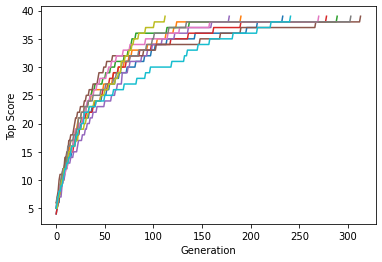

In [21]:
for best_score_list in best_score_lists:
  plt.plot(range(len(best_score_list)), best_score_list)

#plt.title('step: '+str(step)+' prune: '+str(prune_population))
plt.xlabel('Generation')
plt.ylabel('Top Score')
plt.savefig('phrase.png')

# Figure S1

In [0]:
#Save data for Figure S2
#Run first with step = 2, then with step = 5

import pickle
#pickle.dump(best_score_lists, open( "step2.p", "wb" ) )
pickle.dump(best_score_lists, open( "step5.p", "wb" ) )

In [19]:
step2 = pickle.load( open( "step2.p", "rb" ) )
step5 = pickle.load( open( "step5.p", "rb" ) )

FileNotFoundError: ignored

In [0]:
fig = plt.figure(figsize=(12, 3.5))

plt.subplot(1, 2, 1)
for score in step2:
  plt.plot(range(len(score)), score)
plt.title('Step: 2')
plt.xlabel('Generation')
plt.ylabel('Top Score')
#plt.legend()
plt.axis((0,1000,0,40.0))
#found = [len(x) for x in celecoxib_score_list[0:tries] if len(x) != 1000]
#plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))
left, bottom, width, height = [0.25, 0.2, 0.2, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(range(39),[(x//2)*2 for x in range(39)], color='black')
ax2.set_title('Score')

plt.subplot(1, 2, 2)
for score in step5:
  plt.plot(range(len(score)), score)
plt.title('Step: 5')
plt.xlabel('Generation')
#plt.ylabel('Top Score')
plt.axis((0,1000,0,40.0))
left, bottom, width, height = [0.67, 0.40, 0.2, 0.4]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.plot(range(39),[(x//5)*5 for x in range(39)], color='black')
ax3.set_title('Score')

plt.savefig('step.png')